# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'darkgrid')

import warnings
warnings.filterwarnings('ignore')

# Reading data from link

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Check Correlation between columns

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

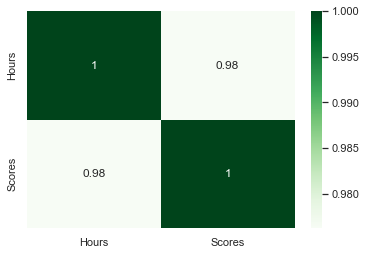

In [7]:
sns.heatmap(df.corr(),annot=True,cmap='Greens')

These 2 columns are highly correlated to each other

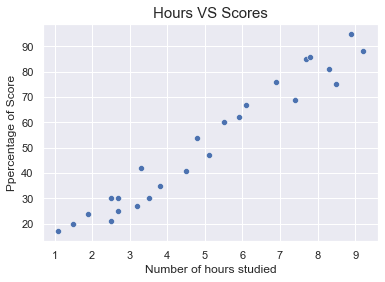

In [8]:
plt.title('Hours VS Scores',fontsize=15);
plt.xlabel('Number of hours studied')
plt.ylabel('Ppercentage of Score')
sns.scatterplot('Hours','Scores',data=df);

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# Dividing the data into x and y to apply Supervised Machine Learning

In [9]:
x = df.drop(columns='Scores')
y = df['Scores']

The next step is to split this data into training and test sets.

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0) 

# Apply Linear Regression Algorithm

In [11]:
from sklearn.linear_model import LinearRegression  
linear_reg = LinearRegression()  
linear_reg.fit(x_train, y_train) 

print("Training complete")

Training complete


In [12]:
linear_reg.coef_

array([9.90482759])

In [13]:
linear_reg.intercept_

0.11629885057472222

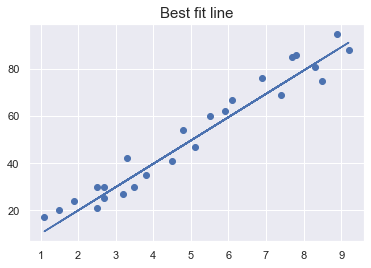

In [14]:
# line = MX + C
line = (linear_reg.coef_*x) + linear_reg.intercept_
plt.scatter(x,y)
plt.title('Best fit line',fontsize=15)
plt.plot(x,line);

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
y_pred = linear_reg.predict(x_test)
y_pred

array([14.97354023, 31.81174713, 73.41202299, 24.87836782, 58.55478161,
       37.75464368, 18.93547126, 77.37395402, 68.4596092 , 11.0116092 ,
       50.63091954, 76.38347126, 32.80222989])

In [16]:
# Comparing Actual vs Predicted
predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
predict

,Actual,Predicted
5,20,14.973540
2,27,31.811747
19,69,73.412023
16,30,24.878368
11,62,58.554782
22,35,37.754644
17,24,18.935471
24,86,77.373954
23,76,68.459609
14,17,11.011609


# Evaluating the model
The final step is to evaluate the performance of algorithm.

In [23]:
from sklearn.metrics import r2_score,mean_absolute_error
print(f'Model Accuracy :{r2_score(y_test,y_pred)}')
print(f'Mean Absolute Error :{mean_absolute_error(y_test,y_pred)}')

Model Accuracy :0.936426433042132
Mean Absolute Error :5.7104845269672815


# Test with own Data

In [35]:
# You can also test with your own data
hours = 9.25
pred = linear_reg.predict([[hours]])
print(f'No of Hours : {hours}')
print(f'Pridected Score : {pred}')

No of Hours : 9.25
Pridected Score : [91.73595402]
